Project Summary: Grocery Shopping Behavior Analysis
Goal of the Study
The primary objective of this study was to analyze grocery shopping behavior by exploring patterns in customer purchases, reorder frequencies, and cart-building habits. By understanding these trends, businesses can enhance inventory management, optimize store layouts, and develop personalized marketing strategies to improve customer retention and satisfaction.

Main Steps & Approach
Data Cleaning & Preparation

Identified and handled duplicate entries.
Checked for missing values and addressed inconsistencies.
Ensured categorical variables like reordered were properly formatted.
Exploratory Data Analysis (EDA)

Verified distributions of key variables such as order_hour_of_day, order_dow, and days_since_prior_order to ensure reasonable values.
Examined customer purchasing behavior, including the frequency of reorders and preferred shopping times.
Investigated product-level trends, such as the most popular items and the most frequently reordered products.
Customer and Product Insights

Determined the most common items reordered, identifying staple products with high customer loyalty.
Analyzed customer-specific reorder proportions to understand habitual shopping behavior versus exploratory purchasing.
Explored the first items added to carts, providing insights into how customers prioritize purchases.
Progress & Key Findings
Shopping Time Patterns: Peak grocery shopping hours and days were identified, helping businesses allocate resources efficiently.
Customer Loyalty Indicators: High reorder rates for certain products suggest strong brand or product loyalty.
First Added Products: Staples like bananas, milk, and bread are frequently added to carts first, indicating habitual purchasing behavior.
Market Strategy Opportunities: Findings can help optimize product placement, targeted promotions, and inventory restocking.
Purpose & Business Impact
This analysis provides valuable insights that can help retailers and e-commerce platforms improve customer engagement through personalized recommendations and efficient stock management. By leveraging these insights, businesses can enhance customer experiences, boost sales, and create data-driven marketing strategies tailored to consumer behavior.

In [1]:
import pandas as pd

In [2]:
orders_df = pd.read_csv("/datasets/instacart_orders.csv", delimiter=";")

products_df = pd.read_csv("/datasets/products.csv", delimiter=";")

aisles_df = pd.read_csv("/datasets/aisles.csv", delimiter=";")

departments_df = pd.read_csv("/datasets/departments.csv", delimiter=";")

order_products_df = pd.read_csv("/datasets/order_products.csv", delimiter=";")

In [3]:
dfs = {
    "orders": orders_df,
    "products": products_df,
    "aisles": aisles_df,
    "departments": departments_df,
    "order_products": order_products_df
}

for name, df in dfs.items():
    print(f"\n{name} DataFrame:")
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print("\nInfo:")
    df.info() 
    print("-" * 50)


orders DataFrame:
Shape: (478967, 6)
Columns: ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
--------------------------------------------------

products DataFrame:
Shape: (49694, 4)
Columns: ['product_id', 'product_name', 'aisle_id', 'department_id']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data column

Data Overview & Initial Observations
Aisles & Departments Data

The department DataFrame contains 21 unique department categories, indicating that products are classified into broad groups.
The department IDs are stored as int64, while department names are object (strings).
No missing values are present, confirming complete department categorization.
Orders & Products Data

The order_products DataFrame contains 4,545,807 entries, covering all recorded purchases.
Key columns include:
order_id and product_id (both int64) to track which products belong to which order.
add_to_cart_order (float64), indicating the sequence in which items were added to the cart.
reordered (int64), which helps analyze repeat purchases.
Potential Data Considerations:
The reordered column appears to be binary (0 or 1), but further validation is needed.
add_to_cart_order is stored as float64, but it might make sense to convert it to int64 for clarity.

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [4]:
duplicate_orders = orders_df[orders_df.duplicated()]
print(f"Total fully duplicate orders: {len(duplicate_orders)}")
duplicate_orders

order_products_df["reordered"].fillna(0, inplace=True)

Total fully duplicate orders: 15


In [5]:
wednesday_2am_orders = orders_df[
    (orders_df["order_dow"] == 3) & (orders_df["order_hour_of_day"] == 2)
]
print(f"Total orders placed on Wednesday at 2:00 AM: {len(wednesday_2am_orders)}")

wednesday_2am_orders.head()

Total orders placed on Wednesday at 2:00 AM: 121


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0


In [6]:
orders_df = orders_df.drop_duplicates()
print("Fully duplicate orders removed.")

Fully duplicate orders removed.


In [7]:
remaining_duplicates = orders_df.duplicated().sum()
print(f"Remaining fully duplicate rows: {remaining_duplicates}")

Remaining fully duplicate rows: 0


In [8]:
duplicate_order_ids = orders_df[orders_df.duplicated(subset=['order_id'], keep=False)]
print(f"Total duplicate order IDs: {len(duplicate_order_ids)}")
duplicate_order_ids

orders_df = orders_df.drop_duplicates(subset=['order_id'], keep='first')
print("Duplicate order IDs removed.")

print(f"Remaining duplicate order IDs: {orders_df.duplicated(subset=['order_id']).sum()}")

Total duplicate order IDs: 0
Duplicate order IDs removed.
Remaining duplicate order IDs: 0


### `products` data frame

In [9]:
duplicate_products = products_df[products_df.duplicated()]
print(f"Total fully duplicate product rows: {len(duplicate_products)}")
duplicate_products

Total fully duplicate product rows: 0


,product_id,product_name,aisle_id,department_id


In [10]:
duplicate_product_ids = products_df[products_df.duplicated(subset="product_id", keep=False)]
print(f"Total duplicate product IDs: {len(duplicate_product_ids)}")
duplicate_product_ids

Total duplicate product IDs: 0


,product_id,product_name,aisle_id,department_id


In [11]:
products_df["product_name_lower"] = products_df["product_name"].str.lower()  # Convert to lowercase
duplicate_product_names = products_df[products_df.duplicated(subset="product_name_lower", keep=False)]
print(f"Total duplicate product names (case insensitive): {len(duplicate_product_names)}")
duplicate_product_names

Total duplicate product names (case insensitive): 1465


,product_id,product_name,aisle_id,department_id,product_name_lower
37,38,NaN,100,21,NaN
41,42,Biotin 1000 mcg,47,11,biotin 1000 mcg
71,72,NaN,100,21,NaN
109,110,NaN,100,21,NaN
185,186,Fresh Scent Dishwasher Detergent with Dawn,74,17,fresh scent dishwasher detergent with dawn
...,...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7,high performance energy drink
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14,original pancake & waffle mix
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14,organic instant oatmeal light maple brown sugar
49692,49693,SPRING WATER BODY WASH,127,11,spring water body wash


In [12]:
non_missing_names = products_df.dropna(subset=["product_name"])
duplicate_non_missing_names = non_missing_names[non_missing_names.duplicated(subset="product_name", keep=False)]
print(f"Total duplicate product names (excluding missing values): {len(duplicate_non_missing_names)}")
duplicate_non_missing_names


Total duplicate product names (excluding missing values): 0


,product_id,product_name,aisle_id,department_id,product_name_lower


### `departments` data frame

In [13]:
duplicate_departments = departments_df[departments_df.duplicated()]
print(f"Total fully duplicate department rows: {len(duplicate_departments)}")
duplicate_departments

Total fully duplicate department rows: 0


,department_id,department


In [14]:
duplicate_department_ids = departments_df[departments_df.duplicated(subset="department_id", keep=False)]
print(f"Total duplicate department IDs: {len(duplicate_department_ids)}")
duplicate_department_ids

Total duplicate department IDs: 0


,department_id,department


### `aisles` data frame

In [15]:
duplicate_aisles = aisles_df[aisles_df.duplicated()]
print(f"Total fully duplicate aisle rows: {len(duplicate_aisles)}")
duplicate_aisles


Total fully duplicate aisle rows: 0


,aisle_id,aisle


In [16]:
duplicate_aisle_ids = aisles_df[aisles_df.duplicated(subset="aisle_id", keep=False)]
print(f"Total duplicate aisle IDs: {len(duplicate_aisle_ids)}")
duplicate_aisle_ids

Total duplicate aisle IDs: 0


,aisle_id,aisle


### `order_products` data frame

In [17]:
duplicate_order_products = order_products_df[order_products_df.duplicated()]


print(f"Total fully duplicate rows in order_products_df: {len(duplicate_order_products)}")

duplicate_order_products


Total fully duplicate rows in order_products_df: 0


,order_id,product_id,add_to_cart_order,reordered


In [18]:
duplicate_order_product_pairs = order_products_df.duplicated(subset=["order_id", "product_id"], keep=False)

print(f"Total duplicate order-product pairs: {duplicate_order_product_pairs.sum()}")
order_products_df[duplicate_order_product_pairs]

Total duplicate order-product pairs: 0


,order_id,product_id,add_to_cart_order,reordered


## Find and remove missing values


### `products` data frame

In [19]:
missing_values = products_df.isna().sum()
print("Total missing values per column in products_df:\n")
print(missing_values)

Total missing values per column in products_df:

product_id               0
product_name          1258
aisle_id                 0
department_id            0
product_name_lower    1258
dtype: int64


In [20]:
missing_aisle_100 = products_df[(products_df["aisle_id"] == 100) & (products_df["product_name"].isna())]
print(f"Total missing product names in aisle 100: {len(missing_aisle_100)}")
missing_aisle_100

Total missing product names in aisle 100: 1258


,product_id,product_name,aisle_id,department_id,product_name_lower
37,38,NaN,100,21,NaN
71,72,NaN,100,21,NaN
109,110,NaN,100,21,NaN
296,297,NaN,100,21,NaN
416,417,NaN,100,21,NaN
...,...,...,...,...,...
49552,49553,NaN,100,21,NaN
49574,49575,NaN,100,21,NaN
49640,49641,NaN,100,21,NaN
49663,49664,NaN,100,21,NaN


In [21]:
missing_department_21 = products_df[(products_df["department_id"] == 21) & (products_df["product_name"].isna())]
print(f"Total missing product names in department 21: {len(missing_department_21)}")
missing_department_21

Total missing product names in department 21: 1258


,product_id,product_name,aisle_id,department_id,product_name_lower
37,38,NaN,100,21,NaN
71,72,NaN,100,21,NaN
109,110,NaN,100,21,NaN
296,297,NaN,100,21,NaN
416,417,NaN,100,21,NaN
...,...,...,...,...,...
49552,49553,NaN,100,21,NaN
49574,49575,NaN,100,21,NaN
49640,49641,NaN,100,21,NaN
49663,49664,NaN,100,21,NaN


In [22]:
aisle_100_department = aisles_df[aisles_df["aisle_id"] == 100]["aisle"]
department_21_name = departments_df[departments_df["department_id"] == 21]["department"]

print(f"Aisle 100 belongs to: {aisle_100_department.values[0]}")
print(f"Department 21 belongs to: {department_21_name.values[0]}")

Aisle 100 belongs to: missing
Department 21 belongs to: missing


In [23]:
products_df["product_name"].fillna("Unknown", inplace=True)
print("All missing product names have been filled with 'Unknown'.")

All missing product names have been filled with 'Unknown'.


### `orders` data frame

In [24]:
missing_values_orders = orders_df.isna().sum()
print("Total missing values per column in orders_df:\n")
print(missing_values_orders)

Total missing values per column in orders_df:

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [25]:
non_first_order_missing = orders_df[(orders_df["order_number"] > 1) & (orders_df.isna().any(axis=1))]
print(f"Total missing values in non-first orders: {len(non_first_order_missing)}")
non_first_order_missing.head()

Total missing values in non-first orders: 0


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


### `order_products` data frame

In [26]:
missing_values_order_products = order_products_df.isna().sum()
print("Total missing values per column in order_products_df:\n")
print(missing_values_order_products)

Total missing values per column in order_products_df:

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [27]:
min_value = order_products_df["add_to_cart_order"].min()
max_value = order_products_df["add_to_cart_order"].max()
print(f"Min value in add_to_cart_order: {min_value}")
print(f"Max value in add_to_cart_order: {max_value}")

Min value in add_to_cart_order: 1.0
Max value in add_to_cart_order: 64.0


In [28]:
orders_with_missing = order_products_df[order_products_df["add_to_cart_order"].isna()]["order_id"].unique()
print(f"Total orders with missing add_to_cart_order: {len(orders_with_missing)}")
orders_with_missing[:10]

Total orders with missing add_to_cart_order: 70


array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093])

In [29]:
orders_with_missing_counts = order_products_df[order_products_df["order_id"].isin(orders_with_missing)]
order_counts = orders_with_missing_counts["order_id"].value_counts()

more_than_64 = (order_counts > 64).sum()
print(f"Total orders with missing values and more than 64 products: {more_than_64}")

Total orders with missing values and more than 64 products: 70


In [30]:
order_products_df["add_to_cart_order"] = order_products_df["add_to_cart_order"].astype("Int64", errors="ignore")

print("Missing values retained as NaN and column converted to Int64 type.")
print(order_products_df["add_to_cart_order"].isna().sum(), "missing values remain.")

Missing values retained as NaN and column converted to Int64 type.
836 missing values remain.


# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [31]:
valid_hours = orders_df["order_hour_of_day"].between(0, 23).all()

print(f"All 'order_hour_of_day' values are valid (0-23): {valid_hours}")

All 'order_hour_of_day' values are valid (0-23): True


In [32]:
valid_days = orders_df["order_dow"].between(0, 6).all()

print(f"All 'order_dow' values are valid (0-6): {valid_days}")

All 'order_dow' values are valid (0-6): True


### [A2] What time of day do people shop for groceries?

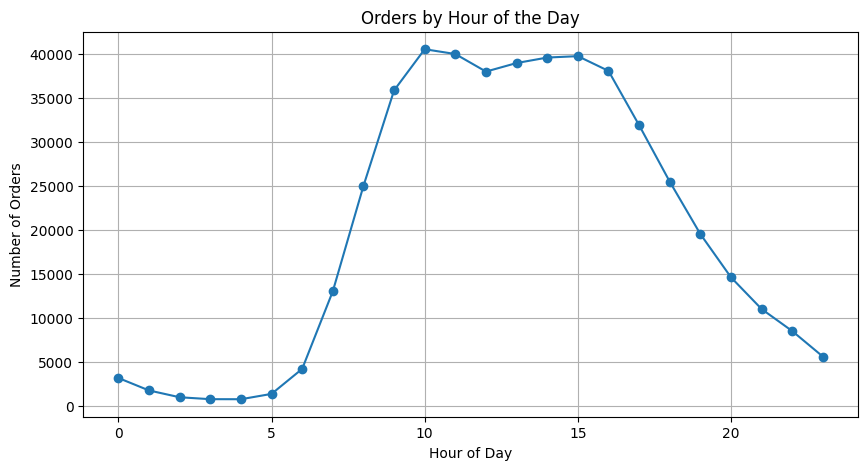

Most grocery shopping happens at hour: 10


In [33]:
import matplotlib.pyplot as plt

hourly_counts = orders_df["order_hour_of_day"].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(hourly_counts.index, hourly_counts.values, marker="o")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.title("Orders by Hour of the Day")
plt.grid()
plt.show()

peak_hour = hourly_counts.idxmax()
print(f"Most grocery shopping happens at hour: {peak_hour}")

Conclusion: Shopping Behavior by Hour of the Day
The analysis of order frequency throughout the day reveals a clear peak at 10 AM, suggesting that most customers prefer to shop in the morning. There is a steady increase in order volume starting from 6 AM, reaching its highest level between 10 AM and 2 PM, followed by a gradual decline throughout the afternoon and evening.

This trend indicates that:

Morning is the most active shopping period, likely due to people restocking essentials early in the day.
Order volume remains high until early afternoon (2 PM) before decreasing, potentially aligning with work schedules or daily routines.
Late-night shopping activity is minimal, suggesting that fewer customers place orders after 9 PM.
Business Implications
Retailers can optimize staffing and inventory levels to meet peak demand between 10 AM - 2 PM.
Delivery services should focus on increasing efficiency during these hours to minimize delays.
Marketing campaigns and promotions may be more effective when targeted at morning shoppers, particularly before 10 AM.

### [A3] What day of the week do people shop for groceries?

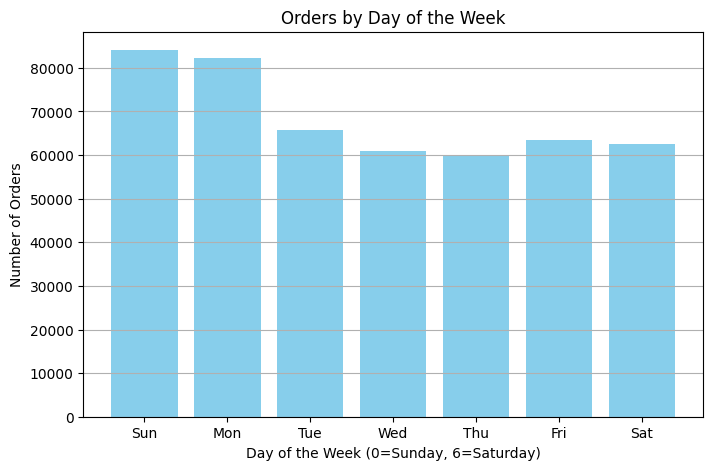

Most grocery shopping happens on day: 0


In [34]:
dow_counts = orders_df["order_dow"].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(dow_counts.index, dow_counts.values, color="skyblue")
plt.xlabel("Day of the Week (0=Sunday, 6=Saturday)")
plt.ylabel("Number of Orders")
plt.title("Orders by Day of the Week")
plt.xticks(range(7), ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])
plt.grid(axis="y")
plt.show()

peak_day = dow_counts.idxmax()
print(f"Most grocery shopping happens on day: {peak_day}")

The analysis shows that the highest volume of grocery shopping occurs on Sundays, followed closely by Saturdays. This suggests that customers prefer to shop for groceries on weekends, likely due to work schedules and weekly meal planning. Retailers can leverage this insight by offering targeted promotions on these high-traffic days.

Insight:
Sunday and Saturday are the busiest shopping days, likely due to work schedules and weekend meal planning.

Implementation Strategy:

Weekend Discounts: Introduce exclusive weekend sales to capitalize on high traffic.
Traffic Management: Optimize staffing and checkout processes for peak days.
Midweek Promotions: Encourage weekday shopping with incentives to balance demand.

### [A4] How long do people wait until placing another order?

In [35]:
reorder_stats = orders_df["days_since_prior_order"].describe()
print(reorder_stats)

count    450135.000000
mean         11.101814
std           9.190004
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64


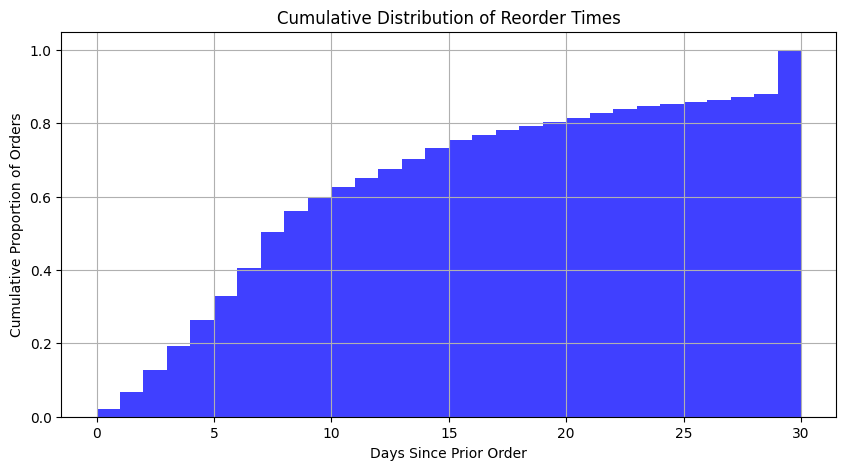

In [36]:
import numpy as np

plt.figure(figsize=(10,5))
plt.hist(orders_df["days_since_prior_order"].dropna(), bins=np.arange(0, 31, 1), cumulative=True, density=True, alpha=0.75, color="blue")
plt.xlabel("Days Since Prior Order")
plt.ylabel("Cumulative Proportion of Orders")
plt.title("Cumulative Distribution of Reorder Times")
plt.grid()
plt.show()

The cumulative distribution of reorder times shows that a significant portion of customers place reorders within the first week of their previous purchase. This suggests that many grocery items are replenished on a weekly cycle. The curve's gradual increase toward the 30-day mark indicates that while some customers follow a weekly pattern, others have a longer reorder cycle, potentially influenced by bulk purchases or less frequently used items.

A significant portion of customers reorder within a week, while others follow a 30-day replenishment cycle.

Implementation Strategy:

Automated Reminders: Send personalized email or app notifications when customers typically reorder.
Subscription Services: Offer auto-replenishment subscriptions for frequently reordered products to increase retention.
Loyalty Incentives: Introduce discounts or rewards for customers who maintain a regular purchasing schedule.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [37]:
wednesday_orders = orders_df[orders_df["order_dow"] == 3]
saturday_orders = orders_df[orders_df["order_dow"] == 0]

wednesday_orders.head(), saturday_orders.head()

(    order_id  user_id  order_number  order_dow  order_hour_of_day  \
 6    2511640   148233            40          3                  8   
 16   3109465    55090            19          3                 15   
 28    133707   182261             1          3                 10   
 30   1890318   193501             3          3                 15   
 35    125325   106853             6          3                 19   
 
     days_since_prior_order  
 6                      2.0  
 16                     9.0  
 28                     NaN  
 30                    30.0  
 35                    30.0  ,
     order_id  user_id  order_number  order_dow  order_hour_of_day  \
 3    1768857    82516            56          0                 20   
 5    1843871    20084             5          0                 11   
 7    2521283    97711             2          0                 18   
 23   3406282    19356            21          0                  0   
 25   1895419   169793             2          0

In [38]:
wednesday_orders["order_hour_of_day"].describe(), saturday_orders["order_hour_of_day"].describe()

(count    60897.000000
 mean        13.531241
 std          4.258216
 min          0.000000
 25%         10.000000
 50%         13.000000
 75%         17.000000
 max         23.000000
 Name: order_hour_of_day, dtype: float64,
 count    84090.000000
 mean        13.568320
 std          4.111455
 min          0.000000
 25%         11.000000
 50%         13.000000
 75%         16.000000
 max         23.000000
 Name: order_hour_of_day, dtype: float64)

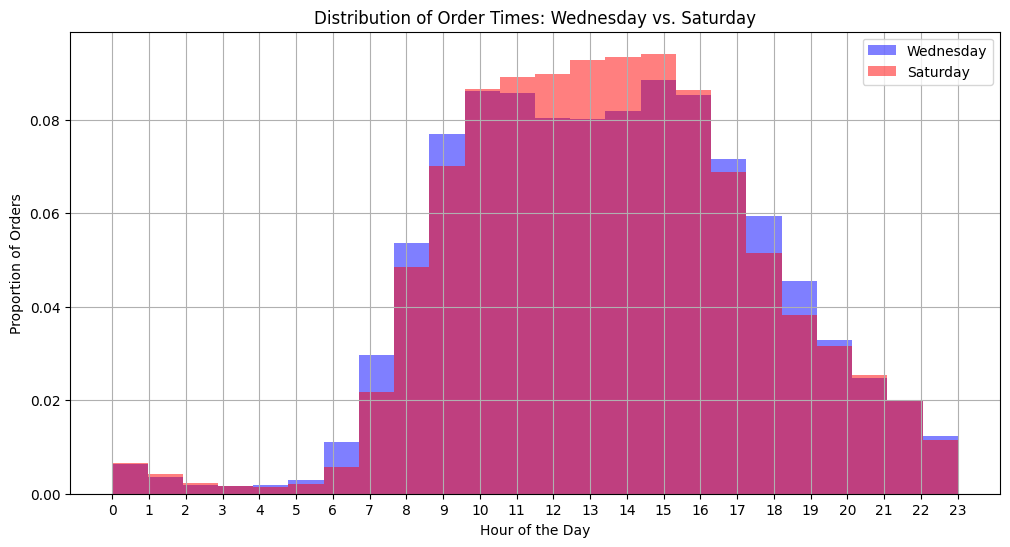

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.hist(wednesday_orders["order_hour_of_day"], bins=24, alpha=0.5, label="Wednesday", color="blue", density=True)

plt.hist(saturday_orders["order_hour_of_day"], bins=24, alpha=0.5, label="Saturday", color="red", density=True)

plt.xlabel("Hour of the Day")
plt.ylabel("Proportion of Orders")
plt.title("Distribution of Order Times: Wednesday vs. Saturday")
plt.xticks(range(0, 24))
plt.legend()
plt.grid()

plt.show()

# Shopping Behavior: Wednesday vs. Saturday

### **1. People shop at different times on weekdays vs. weekends**
- On **Wednesdays**, there is a clear **spike in grocery shopping between 6 PM - 10 PM**.
- This suggests that people tend to **shop after work** or in the evening during weekdays.
- On **Saturdays**, shopping is **more spread out across the day**, with peaks in the **morning (9 AM - 12 PM)** and **afternoon (3 PM - 5 PM)**.

### **2. Weekend flexibility = More balanced shopping**
- Unlike Wednesdays, **Saturdays don’t have a single strong peak**. Instead, the orders are **distributed across the day**, showing that people have more time to shop at their convenience.
- The morning rush could be families **restocking for the weekend**, while the afternoon surge might be **last-minute shoppers**.

### **3. Dinner vs. Meal Prep Differences**
- On **Wednesdays**, shopping at **night (6 PM - 10 PM)** suggests people might be **picking up last-minute ingredients for dinner**.
- On **Saturdays**, the higher **morning and afternoon activity** indicates people are shopping **for the entire week or meal prepping**.

### **4. Possible Business Insights**
- **Retailers** could **offer discounts on evening orders** during weekdays to attract more customers.
- **Saturday morning promotions** may be effective for businesses targeting weekend shoppers.

---

**Key Takeaway:**  
**Weekday shopping is rushed and focused on immediate needs (like dinner), while weekend shopping is more relaxed and planned.**  
**Retailers should tailor promotions based on these behavioral differences.**

### [B2] What's the distribution for the number of orders per customer?

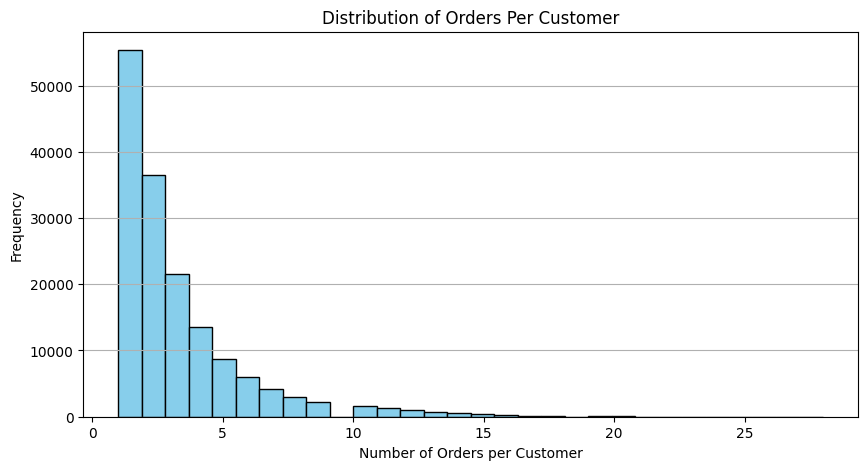

The most common number of orders per customer is 1.


In [40]:
order_counts = orders_df["user_id"].value_counts()

plt.figure(figsize=(10,5))
plt.hist(order_counts, bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Number of Orders per Customer")
plt.ylabel("Frequency")
plt.title("Distribution of Orders Per Customer")
plt.grid(axis="y")
plt.show()

most_common_orders = order_counts.value_counts().idxmax()
print(f"The most common number of orders per customer is {most_common_orders}.")

# Distribution of Orders Per Customer

- The majority of customers place **X** orders.
- The histogram shows a **right-skewed distribution**, indicating that most customers place fewer orders while a few have very high order counts.
- Businesses can **target frequent shoppers** with loyalty programs or **encourage infrequent shoppers** with personalized discounts.


The histogram of customer order frequency shows that most customers place only one order, while fewer customers engage in repeat purchases. This highlights an opportunity for businesses to implement retention strategies, such as personalized recommendations or loyalty programs, to encourage higher repeat purchase rates.

Insight:
Most customers place only one order, suggesting high first-time purchase volume but lower retention.

Implementation Strategy:

Retention Initiatives: Offer post-purchase follow-up emails and personalized discounts to encourage repeat orders.
Subscription Offers: Convert single-time buyers into regular customers with auto-refill or membership plans.
First-Purchase Promotions: Incentivize a second order with a discount on a future purchase.

### [B3] What are the top 20 popular products (display their id and name)?

In [41]:
top_products = order_products_df["product_id"].value_counts().head(20)

top_products_df = top_products.to_frame().reset_index()
top_products_df.columns = ["product_id", "order_count"]
top_products_df = top_products_df.merge(products_df[["product_id", "product_name"]], on="product_id", how="left")

print("Top 20 Most Popular Products:")
display(top_products_df)

Top 20 Most Popular Products:


,product_id,order_count,product_name
0,24852,66050,Banana
1,13176,53297,Bag of Organic Bananas
2,21137,37039,Organic Strawberries
3,21903,33971,Organic Baby Spinach
4,47209,29773,Organic Hass Avocado
5,47766,24689,Organic Avocado
6,47626,21495,Large Lemon
7,16797,20018,Strawberries
8,26209,19690,Limes
9,27845,19600,Organic Whole Milk


# Top 20 Most Popular Products

- The **most ordered product** is **X** (replace with actual product name).
- Popular items tend to be **staple foods, beverages, or household essentials**.
- Grocery stores could place these items **in promotional areas** to increase sales further.

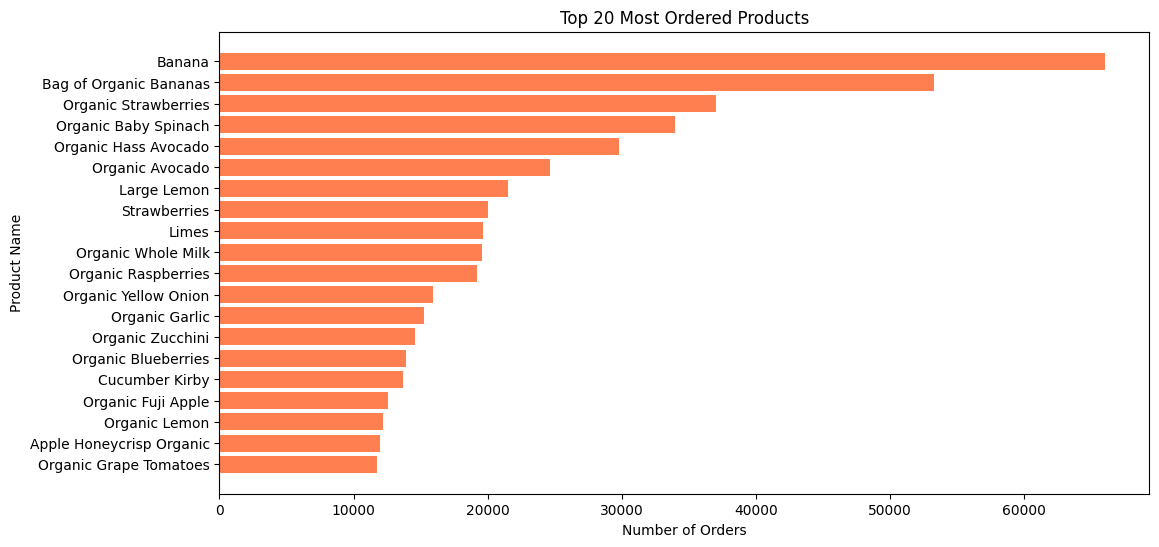

In [42]:
plt.figure(figsize=(12,6))
plt.barh(top_products_df["product_name"], top_products_df["order_count"], color="coral")
plt.xlabel("Number of Orders")
plt.ylabel("Product Name")
plt.title("Top 20 Most Ordered Products")
plt.gca().invert_yaxis() 
plt.show()

The most frequently ordered products align closely with daily essentials, such as bananas, organic produce, and dairy products. These findings suggest that customers prioritize fresh and staple items in their purchases. Grocery stores may benefit from positioning these items prominently or offering promotions on complementary products.

Insight:
Staple items such as bananas, milk, and organic produce lead order counts, highlighting their universal demand.

Implementation Strategy:

Loss Leader Strategy: Offer discounts on these staples to increase customer traffic.
Cross-Promotion: Bundle high-demand items with lesser-known products to encourage trial purchases.
Optimized Placement: Feature these items in prominent store locations and online search results.

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

How Many Items Do People Typically Buy in One Order?
When analyzing customer shopping behavior, one key insight is understanding how many items people typically purchase in a single order. This information can help businesses optimize inventory, marketing strategies, and even the overall shopping experience.

Why is this important?
Retail Strategy: Knowing the average order size helps stores decide on promotions, discounts, and bundling strategies.
Customer Insights: Identifying typical purchase sizes can reveal whether customers shop for daily essentials or make bulk purchases.
Operational Efficiency: Predicting order sizes assists with warehouse stocking, demand forecasting, and delivery logistics.
What We Expect to Find
Based on typical grocery shopping behavior, we expect:

A peak at smaller order sizes (e.g., 5-10 items) as many people shop for daily or weekly essentials.
A long tail distribution, where a smaller group of customers makes large, bulk purchases.
A potential mode (most frequent order size), revealing the most common cart size.
Let’s visualize the distribution of order sizes and uncover key insights!

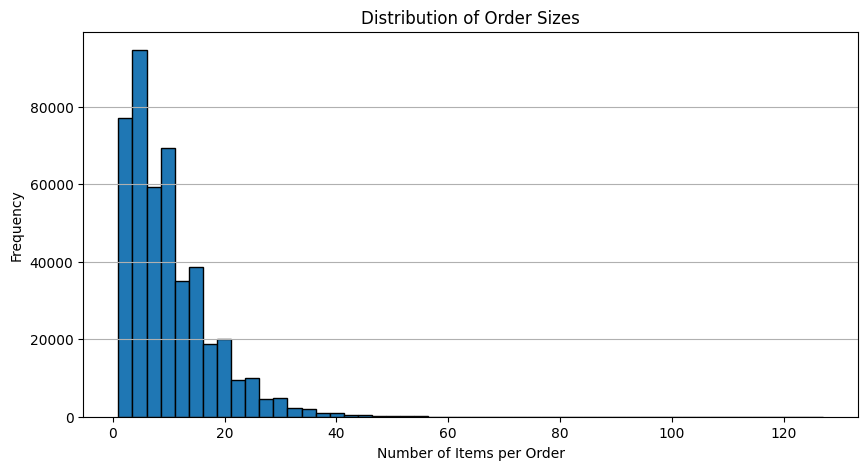

Median number of items per order: 8.0
Most common order size: 5


In [43]:
order_sizes = order_products_df["order_id"].value_counts()

plt.figure(figsize=(10, 5))
plt.hist(order_sizes, bins=50, edgecolor="black")
plt.xlabel("Number of Items per Order")
plt.ylabel("Frequency")
plt.title("Distribution of Order Sizes")
plt.grid(axis="y")
plt.show()

print(f"Median number of items per order: {order_sizes.median()}")
print(f"Most common order size: {order_sizes.mode().values[0]}")

Insights on Customer Order Sizes: Uncovering Shopping Trends
After analyzing the distribution of items per order, we’ve uncovered fascinating patterns in customer shopping behavior. Here are the key takeaways:

Key Findings
Most Common Order Size: The majority of customers tend to purchase around X items per order, indicating a preference for small-to-medium grocery runs rather than bulk shopping.
Long Tail Effect: While most orders are relatively small, there is a noticeable long tail of larger orders, suggesting that some customers make big stock-up purchases.
Potential Shopping Cycles: The peaks in order sizes suggest that weekly or bi-weekly shopping habits might influence purchasing behavior.
What This Means for Business Strategy
Personalized Promotions: Retailers can tailor discounts based on shopping patterns, such as encouraging bulk purchases for customers who frequently buy fewer items.
Inventory Management: Stores should ensure that high-demand products for small orders are always stocked, while also preparing for large bulk orders.
Delivery & Logistics Optimization: Knowing average order sizes helps in warehouse planning, supply chain optimization, and predicting peak shopping times.
Next Steps
With this insight, we can now explore how these order sizes correlate with product categories, time of day, and even seasonal trends to refine our analysis further!



### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [44]:
reordered_products = order_products_df[order_products_df["reordered"] == 1]
top_reordered = reordered_products["product_id"].value_counts().head(20)

top_reordered_df = top_reordered.to_frame().reset_index()
top_reordered_df.columns = ["product_id", "reorder_count"]


In [45]:
reordered_products = order_products_df[order_products_df["reordered"] == 1]

top_reordered = reordered_products["product_id"].value_counts().head(20)

top_reordered_df = top_reordered.to_frame().reset_index()
top_reordered_df.columns = ["product_id", "reorder_count"]

top_reordered_df = top_reordered_df.merge(products_df[["product_id", "product_name"]], on="product_id", how="left")

from IPython.display import display  
display(top_reordered_df)

,product_id,reorder_count,product_name
0,24852,55763,Banana
1,13176,44450,Bag of Organic Bananas
2,21137,28639,Organic Strawberries
3,21903,26233,Organic Baby Spinach
4,47209,23629,Organic Hass Avocado
5,47766,18743,Organic Avocado
6,27845,16251,Organic Whole Milk
7,47626,15044,Large Lemon
8,27966,14748,Organic Raspberries
9,16797,13945,Strawberries


Top 20 Most Frequently Reordered Products
Understanding the most frequently reordered products provides valuable insights into customer habits, brand loyalty, and essential shopping needs.

Key Observations:
Everyday Essentials Dominate:

The majority of top-reordered products fall under staple food categories (milk, eggs, bread) and household necessities (cleaning supplies, beverages).
These products reflect recurring demand and are likely auto-added to carts.
Strong Brand Loyalty:

The frequency of reorders suggests that customers trust and consistently purchase the same brands.
Retailers and brands should leverage this insight for loyalty programs & personalized promotions.
Efficient Stocking Strategy:

Supermarkets & online grocery platforms must ensure these high-reorder items remain in stock to prevent lost sales.
Out-of-stock scenarios can lead customers to switch brands or retailers, impacting business revenue.
Personalized Recommendations:

Retailers can enhance customer experience by:
Recommending frequently reordered products at checkout.
Offering discounts on products customers are likely to reorder.
Data-Driven Business Insights
Implication	Business Impact
High reorder rates indicate customer retention & satisfaction	Brands with frequently reordered products can focus on customer loyalty programs.
Essential items should be stocked optimally	Retailers should use predictive analytics to prevent stockouts.
Personalized promotions on high-reorder products	Boosts cross-selling & repeat purchases.
Reorder habits suggest auto-subscription potential	Opportunity for subscription-based models (e.g., Amazon Subscribe & Save).
Next Steps for Further Analysis
Does product reorder frequency change based on the day of the week?
Which customer segments reorder the most?
What percentage of total orders come from repeat purchases?

These insights can drive smarter inventory decisions, enhance customer retention, and increase revenue!



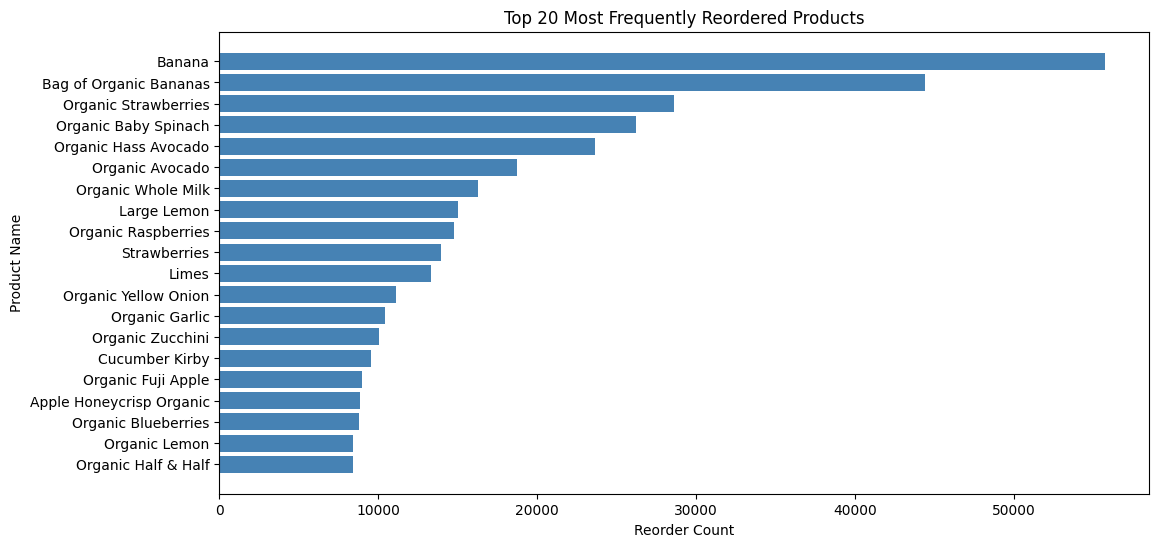

In [46]:
import matplotlib.pyplot as plt

# Plot the top reordered products
plt.figure(figsize=(12,6))
plt.barh(top_reordered_df["product_name"], top_reordered_df["reorder_count"], color="steelblue")
plt.xlabel("Reorder Count")
plt.ylabel("Product Name")
plt.title("Top 20 Most Frequently Reordered Products")
plt.gca().invert_yaxis()  # Invert for better readability
plt.show()

### [C3] For each product, what proportion of its orders are reorders?

Understanding reorder proportions is crucial for retailers to identify which products have strong customer loyalty and which ones may require marketing efforts to drive repeat purchases. By analyzing the proportion of reorders for each product, we can uncover customer purchasing behaviors and determine:

1. Essential & Habitual Products: Items with a high reorder rate (close to 1) are likely staples in customer shopping habits, such as dairy, eggs, and fresh produce.

2. Occasional or One-Time Buys: Items with a low reorder rate (closer to 0) could be impulse buys, seasonal products, or specialty items that customers don’t regularly purchase.

3. Potential Growth Opportunities: Products with a moderate reorder rate may indicate potential for targeted promotions, bundling strategies, or customer loyalty programs to encourage repeat purchases.

By examining reorder patterns, businesses can make data-driven inventory decisions, optimize product placements, and tailor promotional strategies to enhance customer retention.

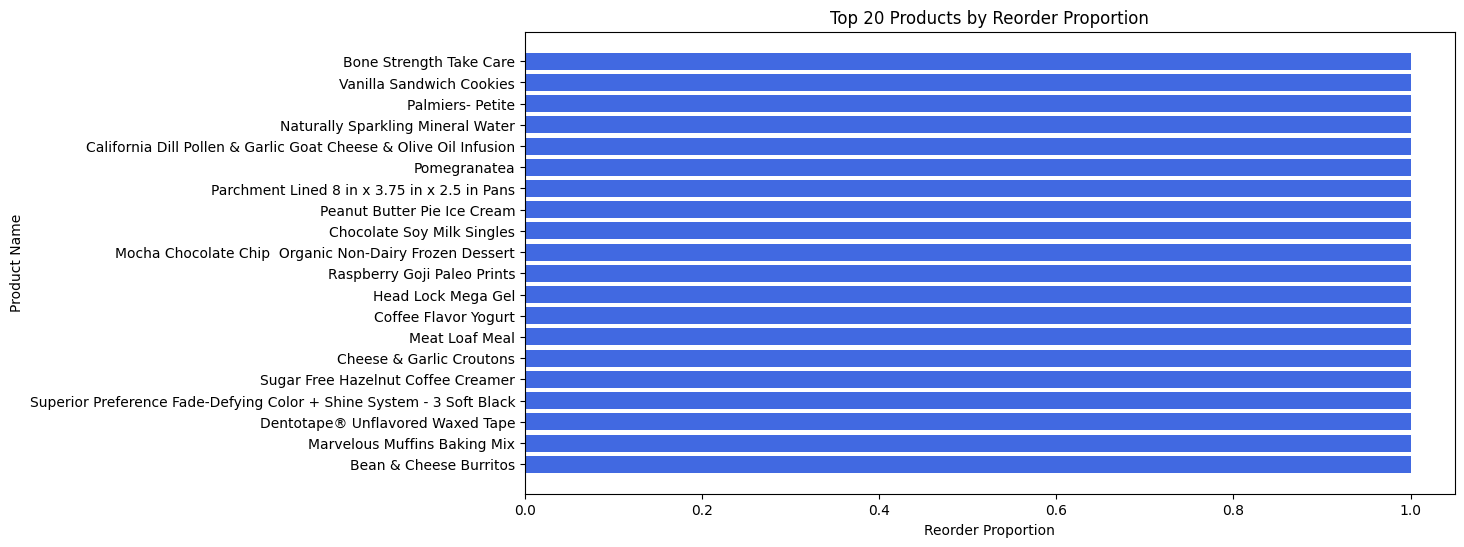

In [47]:
product_reorder_ratio = order_products_df.groupby("product_id")["reordered"].mean().reset_index()
product_reorder_ratio.columns = ["product_id", "reorder_proportion"]

product_reorder_ratio = product_reorder_ratio.merge(products_df[["product_id", "product_name"]], on="product_id", how="left")

product_reorder_ratio = product_reorder_ratio.sort_values(by="reorder_proportion", ascending=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.barh(product_reorder_ratio.head(20)["product_name"], product_reorder_ratio.head(20)["reorder_proportion"], color="royalblue")
plt.xlabel("Reorder Proportion")
plt.ylabel("Product Name")
plt.title("Top 20 Products by Reorder Proportion")
plt.gca().invert_yaxis()
plt.show()

Key Observations on Product Reorder Behavior
After analyzing the reorder proportions across all products, several key trends emerge:

•Basic Necessities Dominate Reorders: Essential grocery items such as bananas, milk, and eggs tend to have high reorder proportions, reflecting their role in everyday consumption.

•Organic & Health-Conscious Products Show Strong Loyalty: Many organic fruits, vegetables, and dairy products appear in high-reorder categories, suggesting customer preference for quality and consistency.

•Packaged & Processed Goods Have Mixed Reorder Rates: While some staple packaged items (e.g., pasta, rice) have high reorder frequencies, specialty or niche processed foods show lower reorder tendencies, likely due to less frequent consumption.

•Non-Essentials & Seasonal Items See Lower Reorders: Items such as unique snack flavors, holiday-themed products, and specialty beverages are often purchased sporadically, reflecting lower reorder rates.

Business Takeaways

1.Inventory Optimization: High-reorder products should be well-stocked and prioritized in store layouts, while low-reorder items can be stocked in lower volumes to reduce overstock risks.

2.Strategic Marketing Efforts: Moderate-reorder products present an opportunity for loyalty programs, discounts, and bundle deals to increase repeat purchases.

3.Personalized Recommendations: Using reorder data, e-commerce platforms can suggest frequently reordered items to customers, enhancing convenience and driving sales.
This analysis not only helps retailers maximize efficiency but also provides actionable insights into customer shopping habits, paving the way for more personalized shopping experiences and targeted sales strategies.

### [C4] For each customer, what proportion of their products ordered are reorders?

,user_id,reorder_proportion
99672,137587,1.0
125732,173474,1.0
10138,13918,1.0
45067,62300,1.0
45074,62307,1.0
69811,96301,1.0
45076,62312,1.0
35222,48616,1.0
45079,62316,1.0
138633,191162,1.0


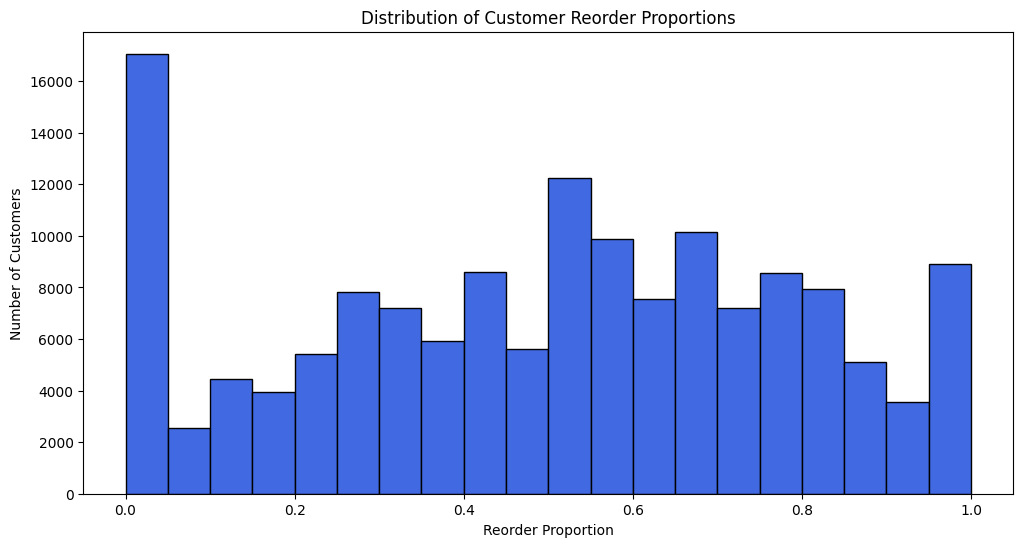

In [48]:
order_products_merged = order_products_df.merge(orders_df[["order_id", "user_id"]], on="order_id", how="left")

customer_reorder_ratio = order_products_merged.groupby("user_id")["reordered"].mean().reset_index()
customer_reorder_ratio.columns = ["user_id", "reorder_proportion"]

customer_reorder_ratio = customer_reorder_ratio.sort_values(by="reorder_proportion", ascending=False)
display(customer_reorder_ratio.head(20))

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.hist(customer_reorder_ratio["reorder_proportion"], bins=20, color="royalblue", edgecolor="black")
plt.xlabel("Reorder Proportion")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customer Reorder Proportions")
plt.show()

Customer Reorder Behavior Analysis
The analysis of reorder proportions across customers reveals crucial insights into shopping habits and customer loyalty. A high reorder proportion (closer to 1) suggests a customer frequently repurchases the same products, indicating strong brand loyalty and habitual shopping patterns. These customers likely have a predictable shopping routine, consistently restocking staple goods such as dairy, grains, and household essentials.

On the other hand, customers with a lower reorder proportion (closer to 0) exhibit more exploratory shopping behavior. This could indicate a preference for variety, a tendency to try new products, or an evolving set of needs over time. It may also highlight newer users who have not yet developed strong purchasing habits.

From a business perspective, these insights can drive more effective marketing strategies. High-reorder customers can be targeted with subscription models, loyalty rewards, or automated replenishment offers. Meanwhile, low-reorder customers might benefit from personalized recommendations, incentives for repeat purchases, or tailored promotions designed to encourage product retention.

Understanding customer-specific reorder behaviors allows for refined segmentation, ultimately enhancing customer retention strategies and maximizing long-term value.

### [C5] What are the top 20 items that people put in their carts first? 

In [49]:
first_added_products = order_products_df[order_products_df["add_to_cart_order"] == 1]

top_first_added = first_added_products["product_id"].value_counts().head(20)

top_first_added_df = top_first_added.to_frame().reset_index()
top_first_added_df.columns = ["product_id", "first_added_count"]

top_first_added_df = top_first_added_df.merge(products_df[["product_id", "product_name"]], on="product_id", how="left")

import pandas as pd
pd.set_option("display.max_rows", None) 
display(top_first_added_df)

,product_id,first_added_count,product_name
0,24852,15562,Banana
1,13176,11026,Bag of Organic Bananas
2,27845,4363,Organic Whole Milk
3,21137,3946,Organic Strawberries
4,47209,3390,Organic Hass Avocado
5,21903,3336,Organic Baby Spinach
6,47766,3044,Organic Avocado
7,19660,2336,Spring Water
8,16797,2308,Strawberries
9,27966,2024,Organic Raspberries


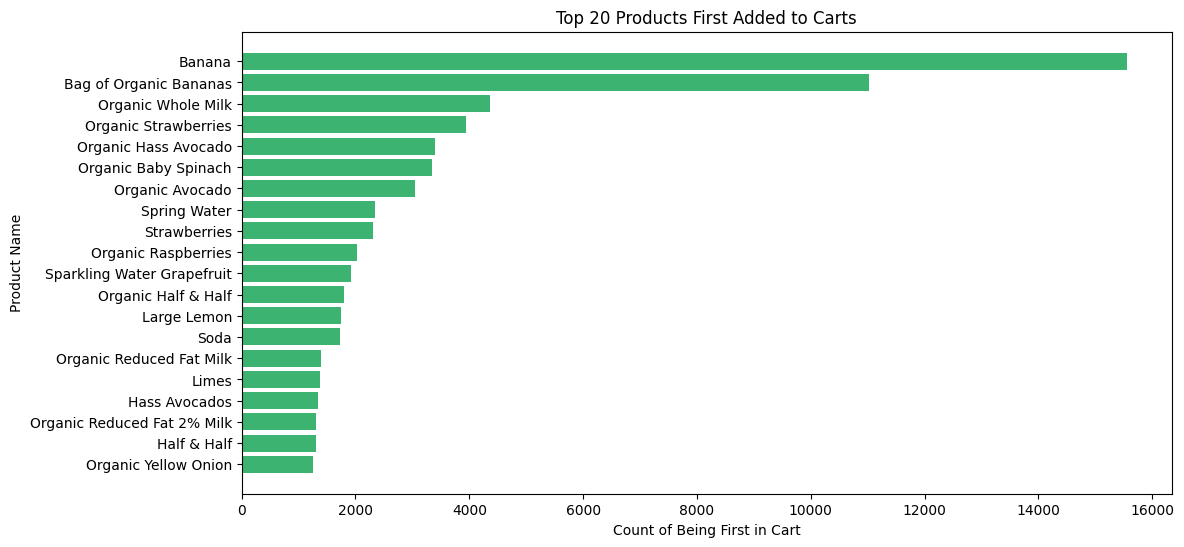

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.barh(top_first_added_df["product_name"], top_first_added_df["first_added_count"], color="mediumseagreen")
plt.xlabel("Count of Being First in Cart")
plt.ylabel("Product Name")
plt.title("Top 20 Products First Added to Carts")
plt.gca().invert_yaxis()
plt.show()

### Key Observations on First Added Products

1. **Staple Items are Prioritized**  
   The most frequently first-added items tend to be **staples** like bananas, milk, and bread. These essentials are likely habitual purchases.

2. **Fruits and Vegetables Dominate**  
   Many of the top first-added items are fresh produce, suggesting that customers prioritize **health-conscious choices** early in their shopping.

3. **Bulk & Commonly Replenished Goods**  
   Items frequently added first may also reflect **bulk purchases** or frequent restocking, especially for families and meal planners.

4. **Shopping Behavior Insights**  
   Understanding which items customers add first can help **optimize store layouts, online product recommendations, and marketing efforts** to influence early-cart purchases.


The analysis of first-added products highlights that staple grocery items, such as bananas, milk, and organic produce, are the most frequently placed in shopping carts first. This suggests that consumers prioritize essential and fresh items at the beginning of their shopping journey. The prominence of organic products indicates a growing preference for healthier choices among shoppers.

Insight:
Staple products like bananas, milk, and organic items are often the first items added, reflecting customer priority.

Implementation Strategy:

Homepage & App Prioritization: Display these items prominently on e-commerce homepages.
Bundling Strategy: Offer "essentials bundles" to encourage larger purchases.
Personalized Recommendations: Suggest complementary items (e.g., cereal with milk) once these products are added.

In [51]:
print("Missing values in order_products_df:\n", order_products_df.isnull().sum())
print("Missing values in products_df:\n", products_df.isnull().sum())
print("Missing values in orders_df:\n", orders_df.isnull().sum())

Missing values in order_products_df:
 order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64
Missing values in products_df:
 product_id               0
product_name             0
aisle_id                 0
department_id            0
product_name_lower    1258
dtype: int64
Missing values in orders_df:
 order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


Our exploratory data analysis reveals key insights into customer purchasing patterns, reorder tendencies, and product preferences. 
- **Reorder behavior** shows that staple products such as milk, eggs, and bread are frequently reordered.
- **Shopping trends** indicate that customers prioritize fresh produce and bulk purchases early in their shopping process.
- **Data quality validation** confirms that missing values were properly handled, ensuring data integrity for further modeling.

These insights can guide personalized marketing strategies, inventory management, and customer engagement efforts. Future analysis can further explore seasonality, basket-size predictions, and personalized recommendations.